In [ ]:
#@markdown I evaluate ColPali on MTEB JinaVDRJDocQARetrieval.
try:
    import mteb
except ModuleNotFoundError:
    !pip install -q mteb[colpali_engine]
    import mteb

# Select model
model_name = "vidore/colpali-v1.3"
model = mteb.get_model(model_name)

# Select tasks
tasks = mteb.get_tasks(tasks=["JinaVDRJDocQARetrieval"])

# evaluate
results = mteb.evaluate(model, tasks=tasks)


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


`torch_dtype` is deprecated! Use `dtype` instead!


adapter_config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/423 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

Evaluating tasks:   0%|          | 0/1 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

default/queries/test-00000-of-00001.parq(…):   0%|          | 0.00/65.2k [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

default/corpus/test-00000-of-00001.parqu(…):   0%|          | 0.00/236M [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/758 [00:00<?, ? examples/s]

default/qrels/test-00000-of-00001.parque(…):   0%|          | 0.00/9.53k [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filtering queries by qrels:   0%|          | 0/744 [00:00<?, ? examples/s]

Processing queries for dataloading:   0%|          | 0/744 [00:00<?, ? examples/s]

Encoding texts:   0%|          | 0/24 [00:00<?, ?it/s]

Encoding images:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
df = results.to_dataframe()

/usr/local/lib/python3.12/site-packages/mteb/results/model_result.py:57: FutureWarning: The provided callable <function mean at 0x2ab78f4e0220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return df.pivot_table(


In [ ]:
df

model_name,task_name,vidore/colpali-v1.3
0,JinaVDRJDocQARetrieval,0.36754


In [ ]:
#@markdown I now evaluate ColPali on MTEB JinaVDR benchmark.
try:
    import mteb
except ModuleNotFoundError:
    !pip install -q mteb[colpali_engine]
    import mteb

# Select model
model_name = "vidore/colpali-v1.3"
model = mteb.get_model(model_name)

# Select JinaVDR benchmark (VisualDocumentRetrieval)
tasks = mteb.get_tasks(tasks=["JinaVDRJDocQARetrieval", "JinaVDRAutomobileCatelogRetrieval", "JinaVDRRamensBenchmarkRetrieval"])

# evaluate
jpn_results = mteb.evaluate(model, tasks=tasks)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluating tasks:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Select JinaVDR benchmark (VisualDocumentRetrieval)
tasks = mteb.get_tasks(tasks=["JinaVDRDocQAEnergyRetrieval", "JinaVDRDocQAGovReportRetrieval", "JinaVDRDocQAHealthcareIndustryRetrieval", "JinaVDRDocQAAI"])

# evaluate
eng_results = mteb.evaluate(model, tasks=tasks)

Evaluating tasks:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
benchmarks = pd.concat(
    [
      jpn_results.to_dataframe(),
      eng_results.to_dataframe()
    ],
    ignore_index=True
)

/usr/local/lib/python3.12/dist-packages/mteb/results/model_result.py:59: FutureWarning: The provided callable <function mean at 0x7d2ebb54c220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return df.pivot_table(
/usr/local/lib/python3.12/dist-packages/mteb/results/model_result.py:59: FutureWarning: The provided callable <function mean at 0x7d2ebb54c220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return df.pivot_table(


In [ ]:
benchmarks

model_name,task_name,vidore/colpali-v1.3
0,JinaVDRAutomobileCatelogRetrieval,0.40180
1,JinaVDRJDocQARetrieval,0.36850
2,JinaVDRRamensBenchmarkRetrieval,0.50862
3,JinaVDRDocQAAI,0.97101
4,JinaVDRDocQAEnergyRetrieval,0.96350
5,JinaVDRDocQAGovReportRetrieval,0.95679
6,JinaVDRDocQAHealthcareIndustryRetrieval,0.96388


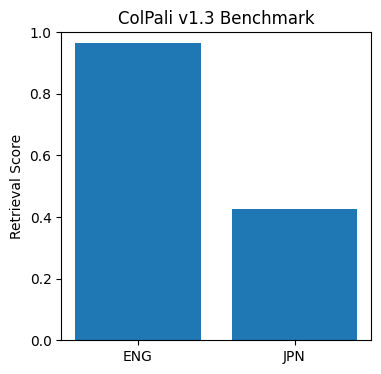

In [ ]:
import matplotlib.pyplot as plt

# assign language labels based on row position
benchmarks["lang"] = ["JPN"] * 3 + ["ENG"] * 4

# compute averages
avg = benchmarks.groupby("lang")["vidore/colpali-v1.3"].mean()

plt.figure(figsize=(4, 4))
plt.bar(avg.index, avg.values)
plt.ylabel("Retrieval Score")
plt.title("ColPali v1.3 Benchmark")
plt.ylim(0, 1.0)
plt.show()

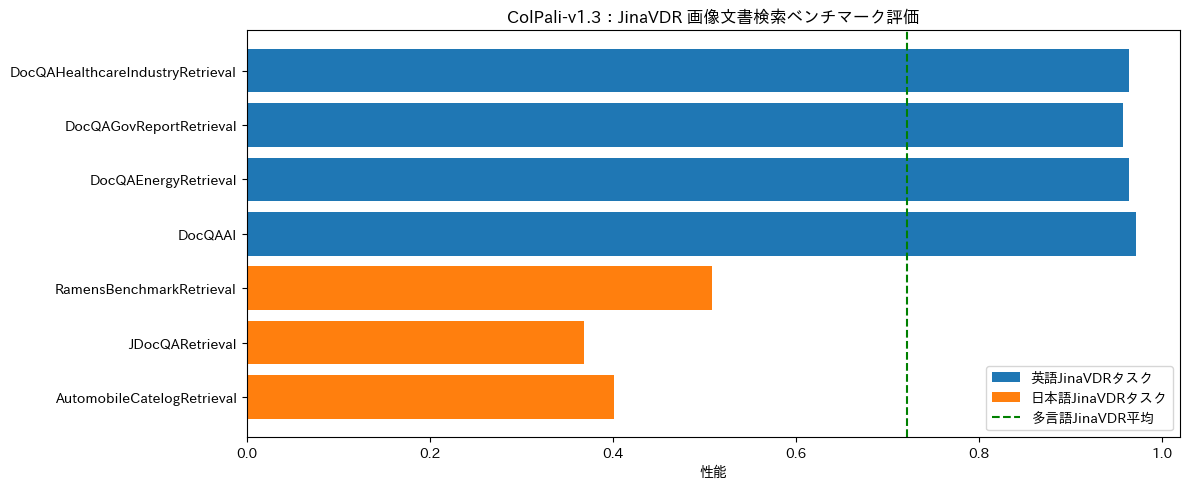

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# データ
tasks = [
    "AutomobileCatelogRetrieval",
    "JDocQARetrieval",
    "RamensBenchmarkRetrieval",
    "DocQAAI",
    "DocQAEnergyRetrieval",
    "DocQAGovReportRetrieval",
    "DocQAHealthcareIndustryRetrieval",
]

scores = [0.40180, 0.36850, 0.50862, 0.97101, 0.96350, 0.95679, 0.96388]

# 下位3を日本語タスクとして色分け
sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i])
japanese_idx = set(sorted_indices[:3])
colors = ["tab:orange" if i in japanese_idx else "tab:blue" for i in range(len(scores))]

plt.figure(figsize=(12, 5))
plt.barh(tasks, scores, color=colors)
plt.xlabel("性能")
plt.title("ColPali-v1.3：JinaVDR 画像文書検索ベンチマーク評価")

# 平均スコアを線で表示
plt.axvline(0.7219, color='green', linestyle='--')

# 凡例
legend_elements = [
    Patch(facecolor="tab:blue", label="英語JinaVDRタスク"),
    Patch(facecolor="tab:orange", label="日本語JinaVDRタスク"),
    Line2D([0], [0], color='green', linestyle='--', label='多言語JinaVDR平均')
]
plt.legend(handles=legend_elements, loc="lower right")

plt.tight_layout()
plt.show()